# Toxic Armories

The Toxic Armories investigation produced a comprehensive dataset over 1000 armories across the US, as well as thousands of pages of documents requested through [Freedom of Information Act](https://www.foia.gov/) requests.

The Oregonian has made both the [inspection reports](https://www.documentcloud.org/public/search/%22Project%20ID%22:%20%2230072%22) and the [dataset](https://github.com/TheOregonian/articles/blob/master/armories_data%20-%2020161201.csv) publicly available. The purpose of this notebook is to demonstrate ways you can make use of both.

In [1]:
import json
import urllib.parse

import numpy as np
import pandas as pd
import requests

%matplotlib inline

## Inspection Reports and DocumentCloud

All of the inspection reports we have as of publication and all that we receive later will be free to the public through the excellent open source journalism resource [DocumentCloud](https://www.documentcloud.org/home).

The ID corresponding to the armories project is 30072. You can either use the DocumentCloud API or use the web interface to find more, but the former allows you to access many documents at once.

In [2]:
# It might be overkill, but I figured it best
# for legibility to separate query arguments as a dict

params_dict = {
    "q":"projectid:30072",
    "per_page":"1000"
}

Here I convert the relatively human-readable dict to the right format for querying DocumentCloud:

In [3]:
params_encoded = urllib.parse.urlencode(params_dict)

In [4]:
r = requests.get('https://www.documentcloud.org/api/search.json', params=params_encoded)

In [5]:
r.json()

{'documents': [{'access': 'public',
   'canonical_url': 'https://www.documentcloud.org/documents/3229436-National-Guard-2002-action-plan.html',
   'created_at': 'Fri, 02 Dec 2016 07:10:12 +0000',
   'description': '',
   'display_language': 'eng',
   'file_hash': 'c725768030f8b41e4599ab4787f5a5d62409c960',
   'id': '3229436-National-Guard-2002-action-plan',
   'language': 'eng',
   'pages': 10,
   'resources': {'page': {'image': 'https://assets.documentcloud.org/documents/3229436/pages/National-Guard-2002-action-plan-p{page}-{size}.gif',
     'text': 'https://www.documentcloud.org/documents/3229436/pages/National-Guard-2002-action-plan-p{page}.txt'},
    'pdf': 'https://assets.documentcloud.org/documents/3229436/National-Guard-2002-action-plan.pdf',
    'print_annotations': 'https://www.documentcloud.org/notes/print?docs[]=3229436',
    'published_url': 'https://www.documentcloud.org/documents/3229436-National-Guard-2002-action-plan.html',
    'search': 'https://www.documentcloud.org/d

In [6]:
documentcloud_df = pd.read_json(json.dumps(r.json()['documents']))

In [7]:
documentcloud_df.head()

,access,canonical_url,created_at,description,display_language,file_hash,id,language,pages,resources,source,title,updated_at
0,public,https://www.documentcloud.org/documents/322943...,2016-12-02 07:10:12,,eng,c725768030f8b41e4599ab4787f5a5d62409c960,3229436-National-Guard-2002-action-plan,eng,10,{'print_annotations': 'https://www.documentclo...,,National Guard 2002 action plan,2016-12-02 18:13:36
1,public,https://www.documentcloud.org/documents/322760...,2016-11-29 23:01:48,None,eng,bf0bf4b6b4d7601e7bb9c268dbcb6bb1a20bd4eb,3227604-371,eng,26,{'print_annotations': 'https://www.documentclo...,None,371,2016-12-02 01:13:46
2,public,https://www.documentcloud.org/documents/322694...,2016-11-29 06:00:13,None,eng,2f0381a151b7d5193b80843e6e2abb9114d4fccd,3226941-Oregon-Military-Department-02-05-15-lead,eng,6,{'print_annotations': 'https://www.documentclo...,None,Oregon Military Department 02-05-15 indoor fir...,2016-12-02 18:13:16
3,public,https://www.documentcloud.org/documents/322694...,2016-11-29 05:58:54,,eng,dd053b3b5f6c70c67c35cbe4ccb192810761d6c5,3226940-Roy-Swafford-Oregon-Military-Departmen...,eng,2,{'print_annotations': 'https://www.documentclo...,,"Roy Swafford, Oregon Military Department, emai...",2016-12-02 07:13:43
4,public,https://www.documentcloud.org/documents/322685...,2016-11-29 01:10:58,,eng,eba10b33e1b6938de88305430b86b8ff749297b4,3226852-1998-Department-of-Defense-IG-Audit,eng,60,{'print_annotations': 'https://www.documentclo...,,1998 Department of Defense IG Audit,2016-12-02 21:13:51


## The Data

Over 18 months, reporter Rob Davis took notes on all of the armories he was investigating, and also tracked them in a spreadsheet. Through collaboration with other data team members, these notes were structured into a compromise between what is human-readable and what is structured for visualization. The dataset that informed his article and underlies the interactive at publication time follows.

In [8]:
df = pd.read_csv('armories_data - 20161201.csv',dtype={'Oregonian ID':'str','Inspection year':'str'})

Each row in `df_data` corresponds to one armory. Below I have selected the row with data on a Portland, OR armory about two miles from the Portland International Airport.

# What these variables mean

In [9]:
df.ix[975]

Oregonian ID                                                                        991
Site Name                                                                       Kliever
Address                                                          10000 NE 33rd Drive ST
City                                                                           Portland
State                                                                            Oregon
Lat                                                                             45.5952
Long                                                                           -122.634
Inspection conducted?                                                               Yes
Inspection report available?                                                        Yes
Inspection year                                                                    2015
Lead present?                                                                       Yes
Earlier lead discovery reported 

Below I change "Unknown" to "`NaN`" so that, when I try to calculate counts for different variables, it is evident that this information is missing:

> **Note:** NaN (not a number) is the standard missing data marker used in pandas

Source: http://pandas-docs.github.io/pandas-docs-travis/dsintro.html#series

In [10]:
df.head()

,Oregonian ID,Site Name,Address,City,State,Lat,Long,Inspection conducted?,Inspection report available?,Inspection year,Lead present?,Earlier lead discovery reported,Highest lead level detected (ug),Where highest lead level detected?,Lead present outside range?,Notes,Had firing range?,Firing range use,Additional details
0,1099,AFRC Mobile,1620 S. Broad St,Mobile,Alabama,30.653749,-88.062620,No,No,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,NaN,NaN
1,1100,Alexander City,2101 Sugar Creek Rd,Alexander City,Alabama,32.915291,-85.956620,Yes,Yes,2014,Yes,NaN,331,Firing range: center floor,Unknown,NaN,Yes,NaN,NaN
2,1101,Aliceville,539 Memorial Parkway NW,Aliceville,Alabama,33.127105,-88.145265,Yes,Yes,2012,Yes,NaN,265,Bottom vault floor,Unknown,NaN,Unknown,NaN,NaN
3,1102,Birmingham AFRC,5300 57th St N,Birmingham,Alabama,33.574734,-86.752784,Yes,Yes,2012,No,NaN,NaN,NaN,No,NaN,Unknown,NaN,NaN
4,1103,Brantley,10415 Opp Highway,Brantley,Alabama,31.525127,-86.235936,No,No,2011,Unknown,Yes,NaN,NaN,Unknown,NaN,Yes,NaN,2011 report found 191 ug on converted firing r...


If you aren't already familiar with programming: below I change the character values from "Yes" and "No," called `Strings` in Python and many other programming languages, to numbers (1,0) so that I can calculate rates of inspection or rates of lead presence later.

In [11]:
df_modified = df.replace(to_replace=['Unknown','Yes','No'],value=[np.nan,1,0])

In [12]:
df_modified.head()

,Oregonian ID,Site Name,Address,City,State,Lat,Long,Inspection conducted?,Inspection report available?,Inspection year,Lead present?,Earlier lead discovery reported,Highest lead level detected (ug),Where highest lead level detected?,Lead present outside range?,Notes,Had firing range?,Firing range use,Additional details
0,1099,AFRC Mobile,1620 S. Broad St,Mobile,Alabama,30.653749,-88.062620,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1100,Alexander City,2101 Sugar Creek Rd,Alexander City,Alabama,32.915291,-85.956620,1.0,1,2014,1.0,NaN,331,Firing range: center floor,NaN,NaN,1.0,NaN,NaN
2,1101,Aliceville,539 Memorial Parkway NW,Aliceville,Alabama,33.127105,-88.145265,1.0,1,2012,1.0,NaN,265,Bottom vault floor,NaN,NaN,NaN,NaN,NaN
3,1102,Birmingham AFRC,5300 57th St N,Birmingham,Alabama,33.574734,-86.752784,1.0,1,2012,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1103,Brantley,10415 Opp Highway,Brantley,Alabama,31.525127,-86.235936,0.0,0,2011,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2011 report found 191 ug on converted firing r...


Python's `groupby` behaves much like Excel's pivot tables, and is also a process in SQL.

In [13]:
df_states = df_modified[['State','Oregonian ID','Lead present?','Had firing range?']].groupby('State').sum().reset_index()

Below I've made a new dataframe to examine what proportion of armories in a given state had a firing range, and what proportion had lead.

In [14]:
df_state_count = df_modified[['State','Oregonian ID']].groupby('State').count().reset_index()

I counted the number of unique IDs that The Oregonian had (`Oregonian ID`) for armories within each state, so I'll rename that column to `Armory Count` for the sake of clarity.

In [15]:
df_state_count.rename(columns={'Oregonian ID':'Armory Count'},inplace=True)

In [16]:
df_state_values = df_modified[['State','Inspection conducted?','Inspection report available?','Lead present?','Lead present outside range?','Had firing range?']].groupby('State').sum().reset_index()

Here I recombine the two dataframes because one had to be a calculation that counted the number of armories, while `df_state_values` allowed me to sum the `1`s that I had generated for `Yes` for a given variable, e.g. `Inspection conducted?`

In [17]:
df_states = pd.merge(df_state_count,df_state_values)

I'm going to repurpose `df_state_count` to more easily show the results of some calculations:

In [18]:
df_state_values['Rate of lead in state'] = round(df_states['Lead present?']/df_states['Armory Count'],2)

In [19]:
df_state_values['Rate of inspection'] = round(df_states['Inspection conducted?']/df_states['Armory Count'],2)

### States ordered by what proportion of armories were inspected

This is an unwieldy table by now, but for the sake of comprehensiveness I'll display it in full.

In [20]:
df_state_values.sort_values(by=['Rate of inspection'],ascending=False)

,State,Inspection conducted?,Inspection report available?,Lead present?,Lead present outside range?,Had firing range?,Rate of lead in state,Rate of inspection
21,Montana,16.0,16,16.0,15.0,15.0,1.00,1.00
12,Indiana,49.0,2,2.0,1.0,45.0,0.04,1.00
40,West Virginia,12.0,12,8.0,5.0,12.0,0.67,1.00
37,Utah,11.0,11,11.0,1.0,11.0,1.00,1.00
35,South Dakota,18.0,8,7.0,6.0,17.0,0.39,1.00
30,Oklahoma,10.0,10,8.0,4.0,10.0,0.80,1.00
29,Ohio,25.0,25,25.0,21.0,25.0,1.00,1.00
20,Missouri,34.0,34,25.0,9.0,33.0,0.74,1.00
18,Minnesota,8.0,8,8.0,7.0,8.0,1.00,1.00
14,Louisiana,5.0,5,5.0,3.0,5.0,1.00,1.00


It's verbose and it isn't pretty, but plotting is also built into pandas!

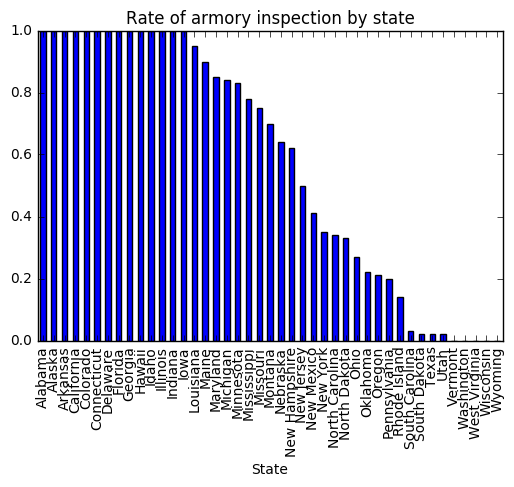

In [21]:
df_state_values[['Rate of inspection']].sort_values(
    by='Rate of inspection', ascending=False).plot(
    kind='bar',
    title='Rate of armory inspection by state',
    legend=False,
    x=df_state_values['State'])

Please feel free to open issues with your questions and also to share your own exploration and analyses with me! I'll be updating with analyses and plotting with Seaborn soon.